## 1. Load Library and Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# Read Dataset
data_EEG = pd.read_csv('Epileptic Seizure Recognition.csv')

## 2. Pre-Processing Step

In [3]:
data_EEG.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [4]:
data_EEG.dropna(inplace=True)
data_EEG.reset_index(drop=True, inplace=True)
data_EEG

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3


In [5]:
data_EEG.isna().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

In [6]:
# Dataframe information
data_EEG.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Data columns (total 180 columns):
 #    Column   Non-Null Count  Dtype 
---   ------   --------------  ----- 
 0    Unnamed  11500 non-null  object
 1    X1       11500 non-null  int64 
 2    X2       11500 non-null  int64 
 3    X3       11500 non-null  int64 
 4    X4       11500 non-null  int64 
 5    X5       11500 non-null  int64 
 6    X6       11500 non-null  int64 
 7    X7       11500 non-null  int64 
 8    X8       11500 non-null  int64 
 9    X9       11500 non-null  int64 
 10   X10      11500 non-null  int64 
 11   X11      11500 non-null  int64 
 12   X12      11500 non-null  int64 
 13   X13      11500 non-null  int64 
 14   X14      11500 non-null  int64 
 15   X15      11500 non-null  int64 
 16   X16      11500 non-null  int64 
 17   X17      11500 non-null  int64 
 18   X18      11500 non-null  int64 
 19   X19      11500 non-null  int64 
 20   X20      11500 non-null  int64 
 21   X21      1

In [7]:
# Descriptive statistics
data_EEG.describe() 

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


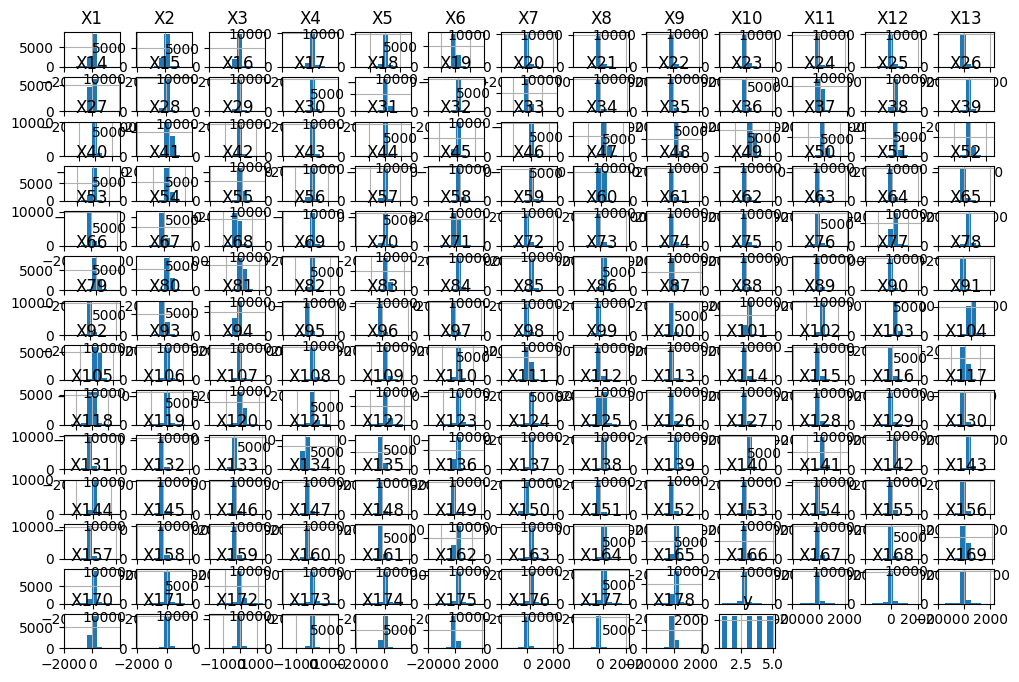

In [8]:
# Periksa distribusi data
data_EEG.hist(figsize=(12,8))
plt.show()


In [9]:
# Check class distribution, class 1: seizure activities, class 2-5: normal activities
data_EEG["y"].value_counts().sort_index()

y
1    2300
2    2300
3    2300
4    2300
5    2300
Name: count, dtype: int64

In [10]:
## transform target value from class 2-5 (normal activities) to 0 (non-seizure)
# Create convert function
def convert_label(x):
    if (x > 1):
        return 0
    else:
        return x

# apply convert function
data_EEG["y"] = data_EEG['y'].apply(convert_label)


The number of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


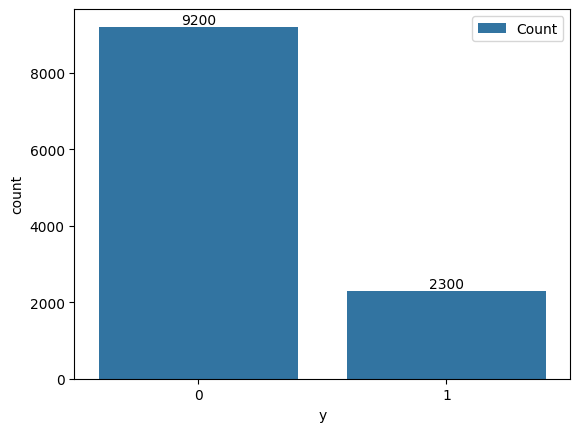

In [11]:
target_column = data_EEG["y"]
# print(target_column)

ax = sns.countplot(x = target_column, label="Count")
ax.bar_label(ax.containers[0])

non_seizure, seizure = target_column.value_counts()
print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)

In [12]:
# Convert dataframe to matrix. Row: data entries. Column: features
X = data_EEG.iloc[:,1:179].values
print(X.shape)
print(X)

(11500, 178)
[[ 135  190  229 ... -116  -83  -51]
 [ 386  382  356 ...  154  143  129]
 [ -32  -39  -47 ...  -35  -35  -36]
 ...
 [  14    6  -13 ...   -2   -1   -8]
 [ -40  -25   -9 ...   68   59   55]
 [  29   41   57 ...   -2    2   20]]


In [13]:
y = data_EEG.iloc[:,179].values
print(y.shape)
print(y)

(11500,)
[0 1 0 ... 0 0 0]


In [14]:
seizure_index_list = []
normal_index_list = []
for i in range(len(y)):
    if (y[i] == 1):
        seizure_index_list.append(i)
    else:
        normal_index_list.append(i)
        
print(seizure_index_list)
print(normal_index_list)

[1, 8, 11, 20, 22, 23, 24, 27, 30, 42, 52, 58, 65, 68, 81, 82, 86, 100, 105, 113, 123, 131, 135, 141, 144, 149, 156, 159, 160, 164, 165, 169, 171, 174, 176, 178, 179, 183, 190, 200, 203, 208, 210, 219, 221, 222, 223, 227, 230, 244, 245, 248, 257, 264, 271, 274, 275, 280, 288, 296, 299, 303, 304, 309, 316, 317, 320, 328, 345, 346, 349, 354, 355, 359, 365, 367, 368, 369, 376, 377, 378, 382, 391, 393, 394, 396, 418, 430, 440, 447, 449, 450, 459, 461, 462, 465, 467, 469, 474, 479, 481, 493, 499, 512, 515, 517, 523, 526, 528, 529, 546, 551, 554, 556, 560, 564, 586, 590, 594, 596, 599, 604, 610, 616, 620, 627, 628, 629, 632, 634, 635, 649, 651, 660, 661, 683, 686, 687, 688, 689, 697, 700, 704, 712, 715, 720, 726, 731, 732, 740, 742, 747, 748, 755, 765, 791, 792, 802, 806, 807, 810, 829, 833, 835, 840, 845, 856, 859, 860, 862, 875, 878, 886, 889, 896, 898, 899, 902, 904, 906, 913, 918, 934, 939, 941, 942, 943, 950, 952, 958, 963, 964, 965, 968, 972, 983, 988, 991, 992, 1002, 1005, 1010, 1012,

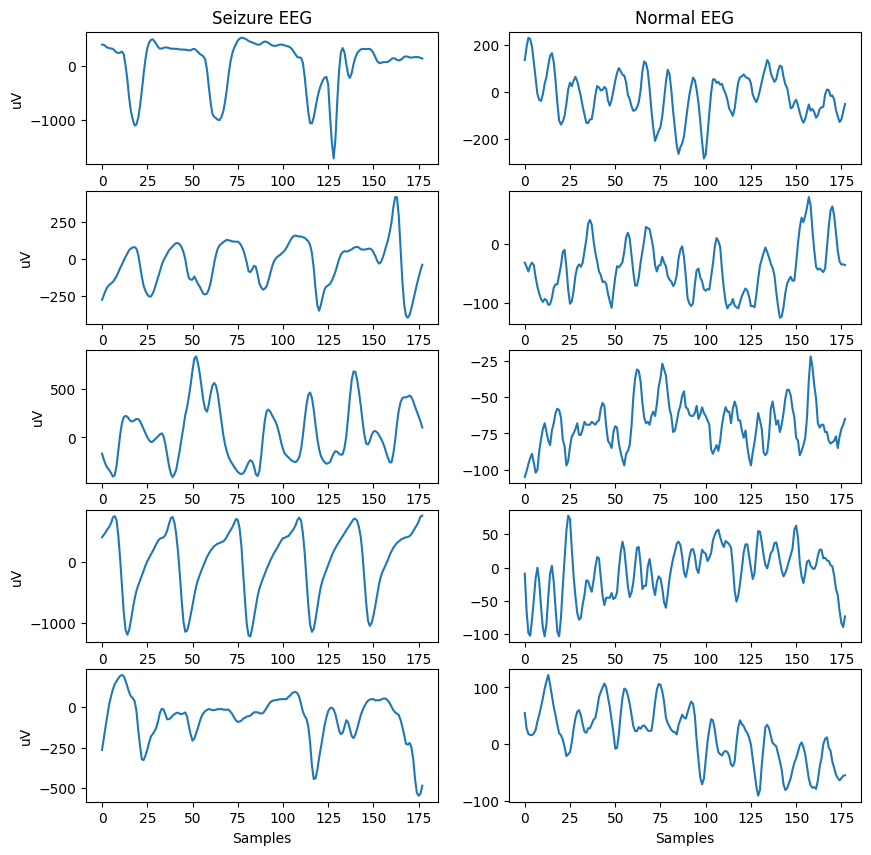

In [15]:
def plot_some_samples(data, label, seizure_index_list, normal_index_list):
    plt.figure(figsize=(10,10))
        
    plt.subplot(5,2,1)
    plt.title('Seizure EEG')
    plt.plot(X[seizure_index_list[0],:])
    plt.ylabel('uV')
    plt.subplot(5,2,3)
    plt.plot(X[seizure_index_list[1],:])
    plt.ylabel('uV')
    plt.subplot(5,2,5)
    plt.plot(X[seizure_index_list[2],:])
    plt.ylabel('uV')
    plt.subplot(5,2,7)
    plt.plot(X[seizure_index_list[3],:])
    plt.ylabel('uV')
    plt.subplot(5,2,9)
    plt.plot(X[seizure_index_list[4],:])
    plt.ylabel('uV')
    plt.xlabel('Samples')

    plt.subplot(5,2,2)
    plt.title('Normal EEG')
    plt.plot(X[normal_index_list[0],:])
    plt.subplot(5,2,4)
    plt.plot(X[normal_index_list[1],:])
    plt.subplot(5,2,6)
    plt.plot(X[normal_index_list[2],:])
    plt.subplot(5,2,8)
    plt.plot(X[normal_index_list[3],:])
    plt.subplot(5,2,10)
    plt.plot(X[normal_index_list[4],:])
    plt.xlabel('Samples')
        
        
plot_some_samples(data=X, label=y, seizure_index_list= seizure_index_list, normal_index_list = normal_index_list)

## 3. Build and Train The Model

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, shuffle=True)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
# Create classifier instance
rfc_clf = RandomForestClassifier()
# Fit to train data
rfc_clf.fit(X_train, y_train)
# Evaluate on train data
train_acc_random_forest =  rfc_clf.score(X_train, y_train)
print("Train accuracy of random forest:", round(train_acc_random_forest * 100, 2), "%") # Round the acc to 2 number after the decimal point
# Evaluate on test data
test_acc_random_forest = rfc_clf.score(X_test, y_test)
print("Test accuracy of random forest:", round(test_acc_random_forest *100, 2), "%") # Round the acc to 2 number after the decimal point

Train accuracy of random forest: 100.0 %
Test accuracy of random forest: 98.0 %


In [19]:
# Parameters of classifiers
print(rfc_clf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [20]:
# Prediction for all test samples
y_pred_random_forest = rfc_clf.predict(X_test)
print(y_pred_random_forest)
print(y_pred_random_forest.shape)

[0 0 0 ... 0 1 0]
(2300,)


Prediction: [0]
Ground truth: 0


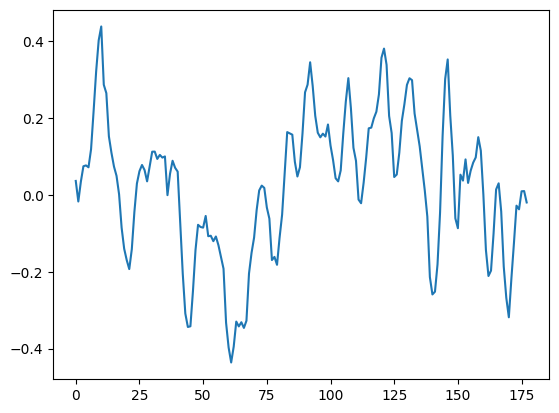

In [21]:
# Prediction for a sample
index = 0
# Plot sample
plt.plot(X_test[index])
# Create sample
X_one_sample = np.expand_dims(X_test[index], 0)

# Predict
# print(X_one_sample.shape)
y_pred_random_forest_one_sample = rfc_clf.predict(X_one_sample)
print("Prediction:", y_pred_random_forest_one_sample) 
print("Ground truth:", y_test[index])